<a href="https://colab.research.google.com/github/Joude-Azzam/DS-Assignment-2/blob/main/DS_U24192295_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [5]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [6]:
pm10_data.dtypes

,0
SensorID,object
time,int64
latitude,float64
longitude,float64
bin0,int64
bin1,int64
bin2,int64
bin3,int64
bin4,int64
bin5,int64


In [7]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-7-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [8]:
merged_data.dtypes

,0
SensorID,object
time,int64
latitude,float64
longitude,float64
bin0,int64
bin1,int64
bin2,int64
bin3,int64
bin4,int64
bin5,int64


In [9]:
pollution_data = merged_data[['pm10','neighborhood']]

In [10]:
pollution_data.shape[0]

118495

In [11]:
merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [12]:
type(pollution_data)

pandas.core.frame.DataFrame

In [13]:
NYC_data = Table.from_df(merged_data, keep_index=False)

In [14]:
pollution_data['pm10'].max()
NYC_data.select(["@id", "pm10"]).group("@id", max).sort('pm10 max',descending = True).take(0)

@id,pm10 max
http://nyc.pediacities.com/Resource/Neighborhood/West_Farms,87341.7


In [15]:
joined_table = Table().from_df(pollution_data)

Task 1

In [16]:
joined_table.show(5)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


In [17]:
print(joined_table.num_rows,"rows")
print(joined_table.num_columns,"cols")

118495 rows
2 cols


In [18]:
def remove_missing_values(table, column_name):
    table = table.where(column_name, are.not_equal_to(None))
    table = table.where(column_name, are.not_equal_to(np.nan))
    table = table.where(column_name, are.not_equal_to(""))
    table = table.where(column_name, are.not_equal_to("NA"))
    print(table.where(column_name, are.equal_to(None)).num_rows, f"None values in {column_name}")
    print(table.where(column_name, are.equal_to(np.nan)).num_rows, f"NaN values in {column_name}")
    print(table.where(column_name, are.equal_to("")).num_rows, f"Empty string values in {column_name}")
    print(table.where(column_name, are.equal_to("NA")).num_rows, f"'NA' string values in {column_name}")
    print("")
    return table


In [ ]:
columns_to_clean = ['pm10']
for col in columns_to_clean:
    cleaned_table = remove_missing_values(joined_table, col)#from joined table

columns_to_clean = ['humidity', 'temperature', 'pm25']#from origional table
for col in columns_to_clean:
    cleaned_table = remove_missing_values(NYC_data, col)

0 None values in pm10
0 NaN values in pm10
0 Empty string values in pm10
0 'NA' string values in pm10

0 None values in humidity
0 NaN values in humidity
0 Empty string values in humidity
0 'NA' string values in humidity

0 None values in temperature
0 NaN values in temperature
0 Empty string values in temperature
0 'NA' string values in temperature

0 None values in pm25
0 NaN values in pm25
0 Empty string values in pm25
0 'NA' string values in pm25



Task 2

In [ ]:
NYC_data.show(1)

SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,geometry,index_right,neighborhood1,boroughCode,borough,@id
NYCP1_01A,1579618560,40.8472,-73.8701,23,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.3,15.2,1.44,5.91,11.35,POINT (-73.870087 40.847183),38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park


In [19]:
def summarize_attribute(attribute):
    stats_table = NYC_data.select(attribute).stats()
    mean_value = NYC_data.column(attribute).mean()

    mean_row = Table().with_columns(
        "statistic", ["mean"],
        attribute, [mean_value]
    )

    return stats_table.append(mean_row)

print("Temperature Statistics:")
print(summarize_attribute('temperature'))

print("\nHumidity Statistics:")
print(summarize_attribute('humidity'))


print("\npm25 Statistics:")
print(summarize_attribute('pm25'))


Temperature Statistics:
statistic | temperature
min       | -7.9
max       | 10471
median    | 7.2
sum       | 976586
mean      | 8.24158

Humidity Statistics:
statistic | humidity
min       | 0
max       | 104.2
median    | 46.2
sum       | 5.9431e+06
mean      | 50.1549

pm25 Statistics:
statistic | pm25
min       | 0
max       | 3267.02
median    | 3.02
sum       | 873843
mean      | 7.37452


In [20]:

average_pm25_by_borough = NYC_data.select("borough", "pm25").group("borough", np.mean)
print(average_pm25_by_borough)


borough   | pm25 mean
Bronx     | 7.795
Brooklyn  | 1.99695
Manhattan | 2.37332
Queens    | 2.07253


Task 3


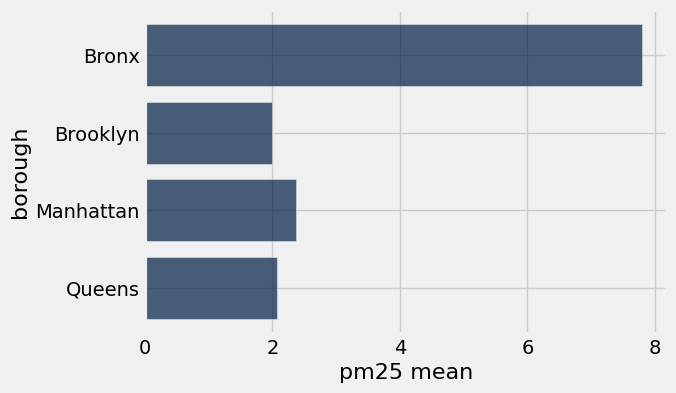

In [21]:
average_pm25_by_borough.barh("borough")

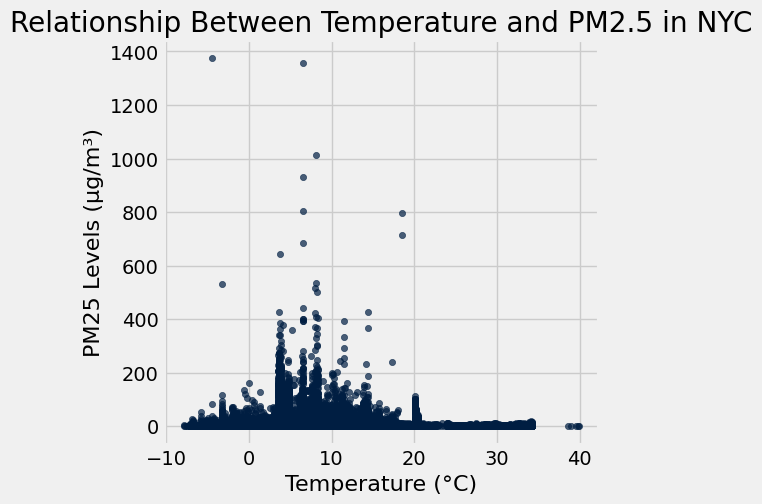

In [22]:
NYC_data.select("temperature", "pm25").where("temperature", are.below(75)).where("pm25", are.below(1500)).scatter("temperature", "pm25")
plt.xlabel("Temperature (°C)")  # X-axis label
plt.ylabel("PM25 Levels (µg/m³)")  # Y-axis label
plt.title("Relationship Between Temperature and PM2.5 in NYC")
plt.show()

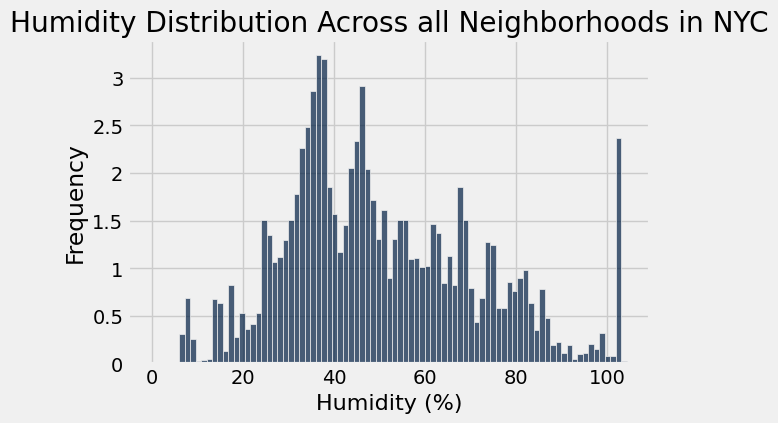

In [24]:
humidity_data = NYC_data.select("humidity", "neighborhood1")
humidity_data.hist("humidity", bins="auto", overlay=True)
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.title("Humidity Distribution Across all Neighborhoods in NYC")
plt.show()


Task 4

In [25]:
def calculate_pm25_category(pm25):

  if pm25 < 12:
    return "Good"
  elif 12 <= pm25 < 35:
    return "Moderate"
  else:
    return "Unhealthy"



In [26]:
NYC_data = NYC_data.with_column('PM25_Category', NYC_data.apply(calculate_pm25_category, 'pm25'))
NYC_data.column('PM25_Category')

array(['Good', 'Good', 'Good', ..., 'Good', 'Good', 'Good'],
      dtype='<U9')

In [27]:
sensor_counts_by_category = NYC_data.group('PM25_Category')
sensor_counts_by_category


PM25_Category,count
Good,101851
Moderate,12651
Unhealthy,3993


task 5

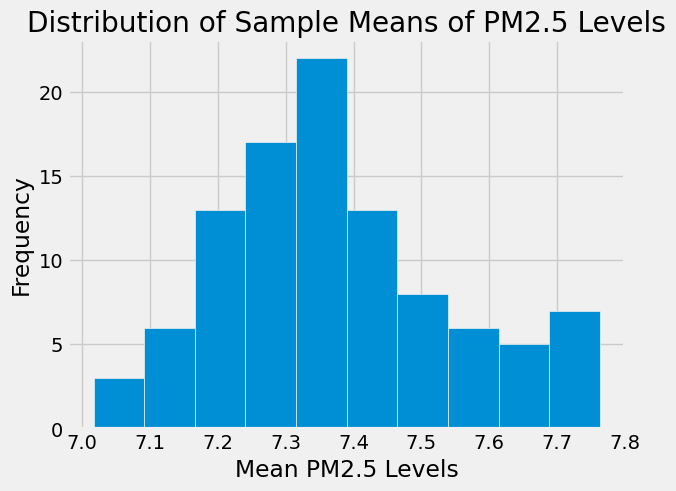

In [29]:
mean_pm25_values = []

for _ in range(100):
    sampled_data = NYC_data.sample( int(NYC_data.num_rows*0.1))
    mean_pm25 = np.mean(sampled_data.column('pm25'))
    mean_pm25_values.append(mean_pm25)

plt.hist(mean_pm25_values, bins= 10)
plt.xlabel("Mean PM2.5 Levels")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Means of PM2.5 Levels")
plt.show()
